In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-mask-detection/annotations/maksssksksss737.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss410.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss537.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss295.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss771.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss234.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss620.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss70.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss281.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss393.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss296.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss756.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss260.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss57.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss224.xml
/kaggle/inpu

In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import keras
from keras.preprocessing.image import *
from keras.layers import *
from keras.models import Sequential
from keras.callbacks import *

In [3]:
face_mask_detection_dir = '../input/face-mask-detection/images'

with_without_mask_train = '../input/withwithout-mask/maskdata/maskdata/train'
with_without_mask_test = '../input/withwithout-mask/maskdata/maskdata/test'

with_mask_train_dir = os.path.join(with_without_mask_train, 'with_mask')
without_mask_train_dir = os.path.join(with_without_mask_train, 'without_mask')

with_mask_test_dir = os.path.join(with_without_mask_test, 'with_mask')
without_mask_test_dir = os.path.join(with_without_mask_test, 'without_mask')

In [4]:
categories=os.listdir(with_without_mask_train)

labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]


In [5]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(with_without_mask_train,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            
            resized=cv2.resize(gray,(img_size,img_size))
           
            data.append(resized)
            target.append(label_dict[category])
            
        except Exception as e:
            print('Exception:',e)

In [6]:

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

np.save('data',data)
np.save('target',new_target)


In [7]:
data=np.load('data.npy')
target=np.load('target.npy')


In [8]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(data,target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
16/16 [==============================] - 23s 1s/step - loss: 0.8053 - accuracy: 0.5062 - val_loss: 0.8080 - val_accuracy: 0.0000e+00
Epoch 2/20
16/16 [==============================] - 22s 1s/step - loss: 0.6621 - accuracy: 0.5977 - val_loss: 0.1158 - val_accuracy: 1.0000
Epoch 3/20
16/16 [==============================] - 22s 1s/step - loss: 0.7664 - accuracy: 0.5541 - val_loss: 0.6306 - val_accuracy: 0.9355
Epoch 4/20
16/16 [==============================] - 22s 1s/step - loss: 0.6405 - accuracy: 0.7483 - val_loss: 0.2911 - val_accuracy: 0.9032
Epoch 5/20
16/16 [==============================] - 22s 1s/step - loss: 0.5449 - accuracy: 0.6999 - val_loss: 1.1034 - val_accuracy: 0.3790
Epoch 6/20
16/16 [==============================] - 22s 1s/step - loss: 0.3909 - accuracy: 0.8459 - val_loss: 0.2241 - val_accuracy: 0.9355
Epoch 7/20
16/16 [==============================] - 22s 1s/step - loss: 0.3378 - accuracy: 0.8566 - val_loss: 0.6235 - val_accuracy: 0.6613
Epoch 8/20
16/16

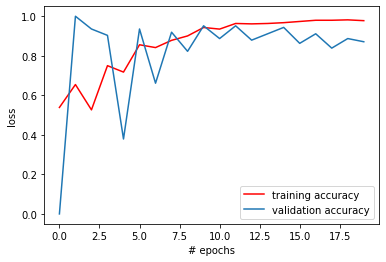

In [10]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [11]:
categories=os.listdir(with_without_mask_test)

labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

img_size=100
data_test=[]
target_test=[]


for category in categories:
    folder_path=os.path.join(with_without_mask_test,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            
            resized=cv2.resize(gray,(img_size,img_size))
           
            data_test.append(resized)
            target_test.append(label_dict[category])
            
        except Exception as e:
            print('Exception:',e)
            
            
data_test=np.array(data_test)/255.0
data_test=np.reshape(data_test,(data_test.shape[0],img_size,img_size,1))
target_test=np.array(target_test)

from keras.utils import np_utils

new_target_test=np_utils.to_categorical(target_test)

np.save('data_test',data_test)
np.save('target_test',new_target_test)
            

{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]


In [12]:
data_test=np.load('data.npy')
target_test=np.load('target.npy')
print(model.evaluate(data_test,target_test))

20/20 [==============================] - 7s 349ms/step - loss: 0.1030 - accuracy: 0.9692
[0.10304532200098038, 0.9691558480262756]


As you can see the model has approximately 97% accuracy!